#Exploratory Analysis

In [37]:
%matplotlib inline 

import requests 
from StringIO import StringIO
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations
from __future__ import division
import matplotlib

pd.options.display.mpl_style = 'default'

## Monthly energy consumption

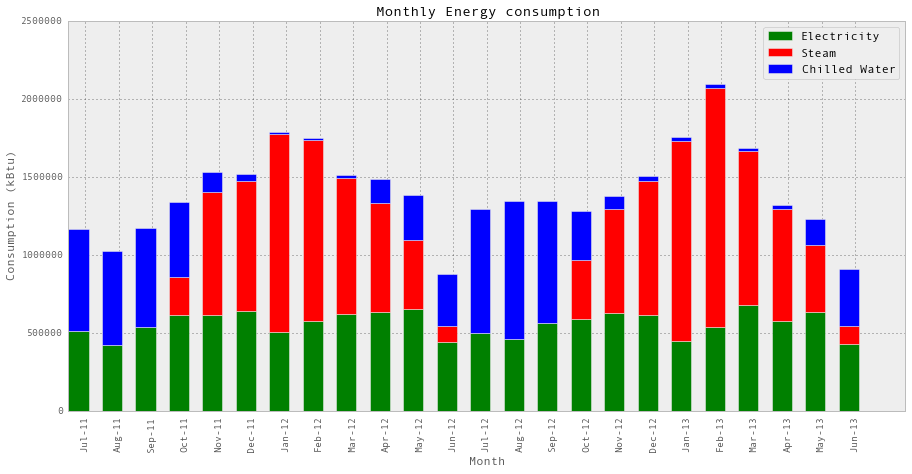

In [56]:
pd.options.display.mpl_style = 'default'
consumption = pd.read_csv('Data/Monthly_Energy_Gund.csv')
for i in range(len(consumption)):
    consumption['CW-kBtu'][i] = float(consumption['CW-kBtu'].values[i].replace(',', ''))
    consumption['EL-kBtu'][i] = float(consumption['EL-kBtu'].values[i].replace(',', ''))
    consumption['ST-kBtu'][i] = float(consumption['ST-kBtu'].values[i].replace(',', ''))

time_index = np.arange(len(consumption)) 
plt.figure(figsize=(15,7))
b1 = plt.bar(time_index, consumption['EL-kBtu'], width = 0.6, color='g')
b2 = plt.bar(time_index, consumption['ST-kBtu'], bottom=consumption['EL-kBtu'], width = 0.6, color='r')
b3 = plt.bar(time_index, consumption['CW-kBtu'], bottom=consumption['EL-kBtu']+consumption['ST-kBtu'], width = 0.6, color='b')

plt.xticks(time_index+0.5, consumption['Time'], rotation=90)
plt.title('Monthly Energy consumption')
plt.xlabel('Month')
plt.ylabel('Consumption (kBtu)')
plt.legend( (b1, b2, b3), ('Electricity', 'Steam', 'Chilled Water') )

## Electricity energy consumption pattern

First, let's see what we can find in hourly and daily electricity energy consumption.

In [39]:
hourlyElectricity = pd.read_excel('Data/hourlyElectricity.xlsx')

index = (hourlyElectricity['startTime'] >= np.datetime64('2011-07-03')) & (hourlyElectricity['startTime'] < np.datetime64('2014-10-26'))
hourlyElectricityForVisualization = hourlyElectricity.loc[index,'electricity-kWh']

print "Data length: ", len(hourlyElectricityForVisualization)/24/7, " weeks"

Data length:  173.0  weeks


<matplotlib.colorbar.Colorbar instance at 0x10a90db00>

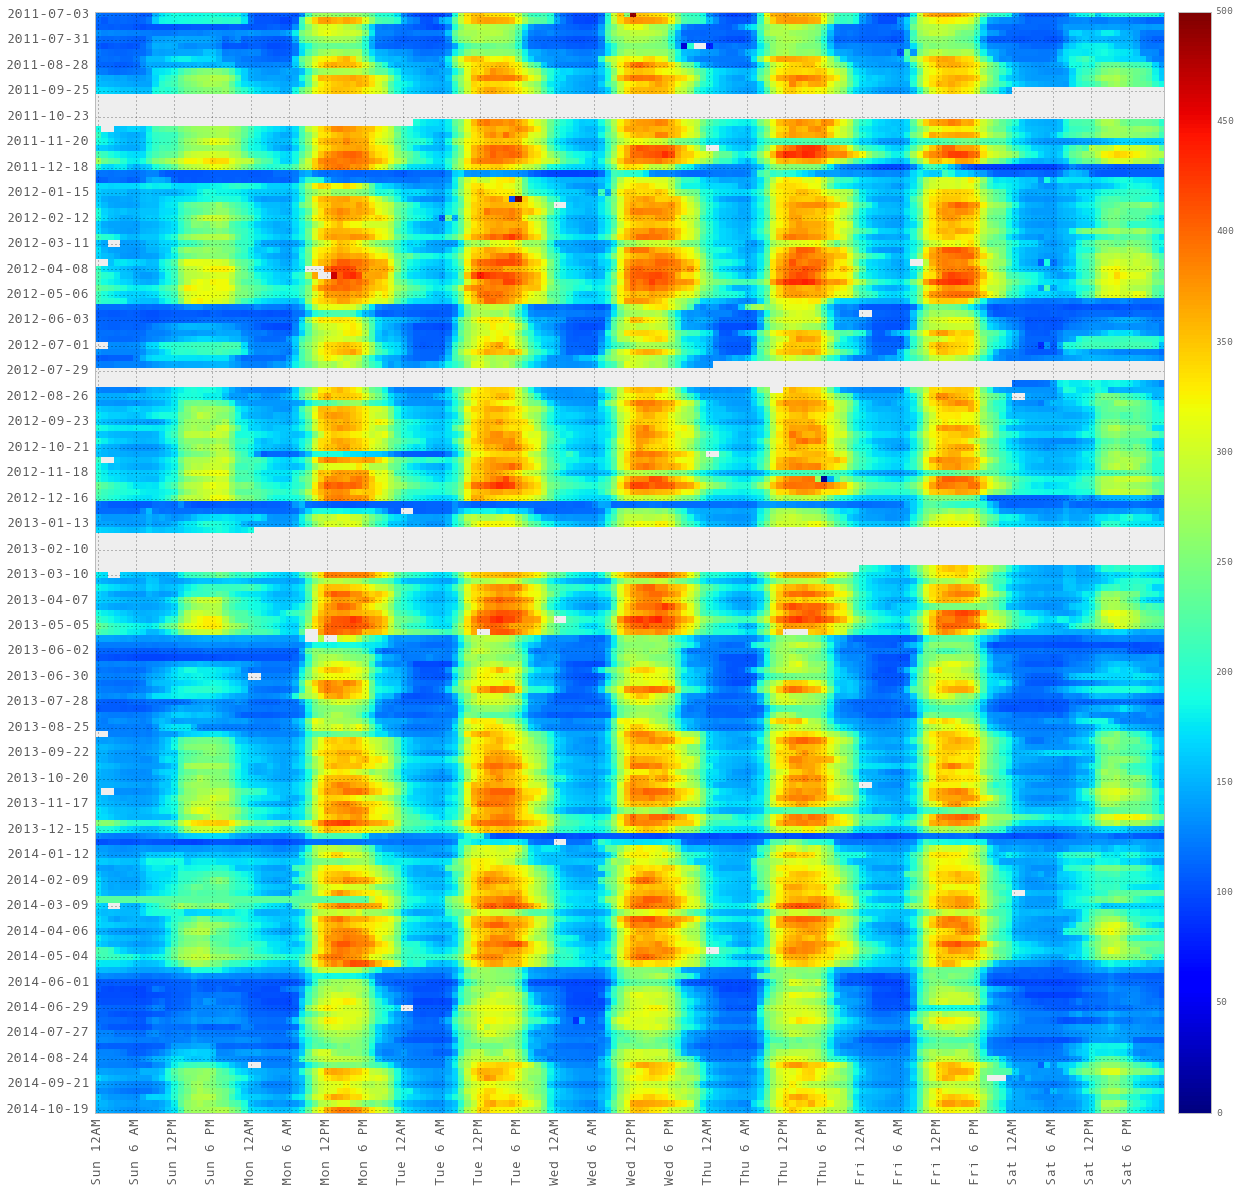

In [40]:
data = hourlyElectricityForVisualization.values
data = data.reshape((len(data)/24/7,24*7))

from mpl_toolkits.axes_grid1 import make_axes_locatable

yTickLabels = pd.DataFrame(data = pd.date_range(start = '2011-07-03', end = '2014-10-25', freq = '4W'), columns=['datetime'])
yTickLabels['date'] = yTickLabels['datetime'].apply(lambda x: x.strftime('%Y-%m-%d'))

s1 = ['Sun ', 'Mon ', 'Tue ', 'Wed ', 'Thu ', 'Fri ', 'Sat ']
s2 = ['12AM ', '6 AM', '12PM', '6 PM']
s1 = np.repeat(s1, 4)
s2 = np.tile(s2, 7)
xTickLabels = np.char.add(s1, s2)

fig = plt.figure(figsize=(20,30))
ax = plt.gca()
im = ax.imshow(data, vmin =0, vmax = 500, interpolation='nearest', origin='upper')
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
ax.set_yticks(range(0,173,4))
ax.set_yticklabels(labels = yTickLabels['date'], fontsize = 14)

ax.set_xticks(range(0,168,6))
ax.set_xticklabels(labels = xTickLabels, fontsize = 14, rotation = 90)

plt.colorbar(im, cax=cax)

> Above is a heapmap of hourly electricity use over three years. The banlk part indicates missing data.

Data length:  172.0  weeks


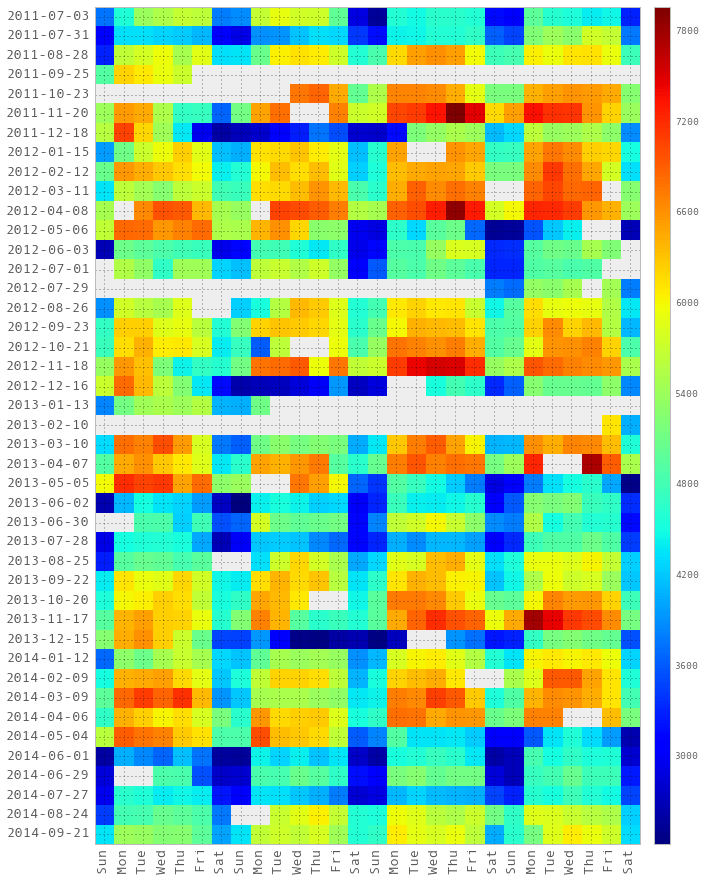

In [41]:
dailyElectricity = pd.read_excel('Data/dailyElectricity.xlsx')

index = (dailyElectricity['startDay'] >= np.datetime64('2011-07-03')) & (dailyElectricity['startDay'] < np.datetime64('2014-10-19'))
dailyElectricityForVisualization = dailyElectricity.loc[index,'electricity-kWh']

print "Data length: ", len(dailyElectricityForVisualization)/7, " weeks"

data = dailyElectricityForVisualization.values
data = data.reshape((len(data)/7/4,7*4))

from mpl_toolkits.axes_grid1 import make_axes_locatable

yTickLabels = pd.DataFrame(data = pd.date_range(start = '2011-07-03', end = '2014-10-25', freq = '4W'), columns=['datetime'])
yTickLabels['date'] = yTickLabels['datetime'].apply(lambda x: x.strftime('%Y-%m-%d'))

s = ['Sun ', 'Mon ', 'Tue ', 'Wed ', 'Thu ', 'Fri ', 'Sat ']
xTickLabels = np.tile(s, 4)

fig = plt.figure(figsize=(14,15))
ax = plt.gca()
im = ax.imshow(data, interpolation='nearest', origin='upper')
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
ax.set_yticks(range(43))
ax.set_yticklabels(labels = yTickLabels['date'], fontsize = 14)

ax.set_xticks(range(28))
ax.set_xticklabels(labels = xTickLabels, fontsize = 14, rotation = 90)

plt.colorbar(im, cax=cax)
plt.show()

plt.figure()
fig = dailyElectricity.plot(figsize = (15, 6))
fig.set_axis_bgcolor('w')
plt.title('All the daily electricity data', fontsize = 16)
plt.ylabel('kWh')
plt.show()


> Above are a heatmap and a plot of daily electricity use. Blank part indicates missing data.

In [42]:
dailyElectricity = pd.read_excel('Data/dailyElectricity.xlsx')
weeklyElectricity = dailyElectricity.asfreq('W', how='sume', normalize=False)

plt.figure()
fig = weeklyElectricity['2012-01':'2014-01'].plot(figsize = (15, 6), fontsize = 15, marker = 'o', linestyle='--')
fig.set_axis_bgcolor('w')
plt.title('Weekly electricity data', fontsize = 16)
plt.ylabel('kWh')
ax = plt.gca()
plt.show()

> Above is a plot of <b>weekly</b> consumption. Broken line part indicates missing data.

It is so obvious the peak consumption is during the finals. And then it suddenly drops. The repeated pattern is very noticeable.

### Findings

* Electricity shows a strong periodical pattern. You can clearly see the difference between day and night, weekdays and weekends. 


* It looks like during each semester, electricity use ramps up toward a peak at finals, perhaps representative of studying patterns. The students are working harder and harder toward finals. Then there is a dip after semesters end, inlcuding Christmas vacation. The electricity consumption is relatively low during January and summer terms, and spring break, when campus can be relatively empty. (Text partially contributed by Steven) 

## Relationship between energy consumption and features

### Main features we considered

In this section, we plot electricity, chilled water and steam consumption (both hourly and daily) against all kinds of features.

In [43]:
# Read in data from Preprocessing results

hourlyElectricityWithFeatures = pd.read_excel('Data/hourlyElectricityWithFeatures.xlsx')
hourlyChilledWaterWithFeatures = pd.read_excel('Data/hourlyChilledWaterWithFeatures.xlsx')
hourlySteamWithFeatures = pd.read_excel('Data/hourlySteamWithFeatures.xlsx')

dailyElectricityWithFeatures = pd.read_excel('Data/dailyElectricityWithFeatures.xlsx')
dailyChilledWaterWithFeatures = pd.read_excel('Data/dailyChilledWaterWithFeatures.xlsx')
dailySteamWithFeatures = pd.read_excel('Data/dailySteamWithFeatures.xlsx')

# An example of Dataframe
dailyChilledWaterWithFeatures.head()

chilledWater-TonDays   startDay     endDay       RH-%       T-C  \
2012-01-01              0.961857 2012-01-01 2012-01-02  76.652174  7.173913   
2012-01-02              0.981725 2012-01-02 2012-01-03  55.958333  5.833333   
2012-01-03              1.003672 2012-01-03 2012-01-04  42.500000 -3.208333   
2012-01-04              1.483192 2012-01-04 2012-01-05  41.541667 -7.083333   
2012-01-05              3.465091 2012-01-05 2012-01-06  46.916667 -0.583333   

               Tdew-C  pressure-mbar  solarRadiation-W/m2  windDirection  \
2012-01-01   3.073913    1004.956522            95.260870     236.086957   
2012-01-02  -2.937500     994.625000            87.333333     253.750000   
2012-01-03 -12.975000    1002.125000            95.708333     302.916667   
2012-01-04 -16.958333    1008.250000            98.750000     286.666667   
2012-01-05  -9.866667    1002.041667            90.750000     258.333333   

            windSpeed-m/s  humidityRatio-kg/kg  coolingDegrees  \
2012-01-01       4.118361             0.004796               0   
2012-01-02       5.914357             0.003415               0   
2012-01-03       6.250005             0.001327               0   
2012-01-04       5.127319             0.000890               0   
2012-01-05       5.162041             0.001746               0   

            heatingDegrees  dehumidification  occupancy  
2012-01-01        7.826087                 0        0.0  
2012-01-02        9.166667                 0        0.3  
2012-01-03       18.208333                 0        0.3  
2012-01-04       22.083333                 0        0.3  
2012-01-05       15.583333                 0        0.3

> Above we print out all the features.

<p><b> coolingDegrees</b>: if T-C - 12 > 0, then = T-C - 12, else = 0. Assume that when outdoor temperature is below 12C, no cooling is needed, which is true for many buildings. This will be useful for daily prediction, because the average of hourly cooling degrees is better than average of hourly temperature.</p>
<p><b> cosHour</b>: $\text{cos}(\text{hourOfDay} \cdot \frac{2\pi}{24})$</p>
<p><b> dehumidification</b>: if humidityRatio - 0.00886 > 0, then = humidityRatio - 0.00886, else = 0. This will be useful for chilled water prediction, especially daily chilled water prediction.</p>
<p><b> heatingDegrees</b>: if 15 - T-C > 0, then = 15 - T-C, else = 0. Assume that when outdoor temperature is above 15C, no heating is needed. This will be useful for daily prediction, because the average of hourly heating degrees is better than average of hourly temperature.</p>
<p><b> occupancy</b>: A number between 0 and 1. 0 indicated no occupants, 1 indicates normal occupancy. This is an estimate based on holidays, weekends and school academic calendar.</p>
<p><b> pressure-mbar</b>: atmospheric pressure</p>
<p><b> RH-% </b>: Relative humidity</p>
<p><b> T-C </b>: Dry-bulb temperature</p>
<p><b> Tdew-C </b>: Dew-point temperature</p>

<b>Humidity ratio</b>: Humidity ratio is calcluated based on T-C, RH and pressure. Humidity ratio is important for chilled water prediction as chilled water is also used to dry the air discharged to rooms. Using humidity ratio will be more efficient and effective than using RH and dew point temperature.

In [44]:
holidays = pd.read_excel('Data/holidays.xlsx')
holidays

startDate    endDate  value
0  2011-07-01 2011-09-06    0.5
1  2011-10-10 2011-10-11    0.6
2  2011-11-24 2011-11-28    0.2
3  2011-12-22 2011-12-24    0.1
4  2011-12-24 2012-01-02    0.0
5  2012-01-02 2012-01-23    0.3
6  2012-03-10 2012-03-19    0.4
7  2012-05-17 2012-09-04    0.5
8  2012-05-28 2012-05-29    0.2
9  2012-10-08 2012-10-09    0.6
10 2012-11-22 2012-11-26    0.2
11 2012-12-22 2012-12-24    0.1
12 2012-12-24 2013-01-02    0.0
13 2013-01-02 2013-01-27    0.3
14 2013-01-20 2013-01-21    0.1
15 2013-03-16 2013-03-25    0.4
16 2013-05-18 2013-09-03    0.5
17 2013-10-14 2013-10-15    0.6
18 2013-11-28 2013-12-02    0.2
19 2013-12-20 2013-12-24    0.1
20 2013-12-24 2014-01-02    0.0
21 2014-01-02 2014-01-26    0.3
22 2014-03-16 2014-03-24    0.4
23 2014-05-17 2014-09-02    0.5

> Above is the setting for "occupancy". Full occupancy is assigned a value of 1.

### Energy Consumption versus Features

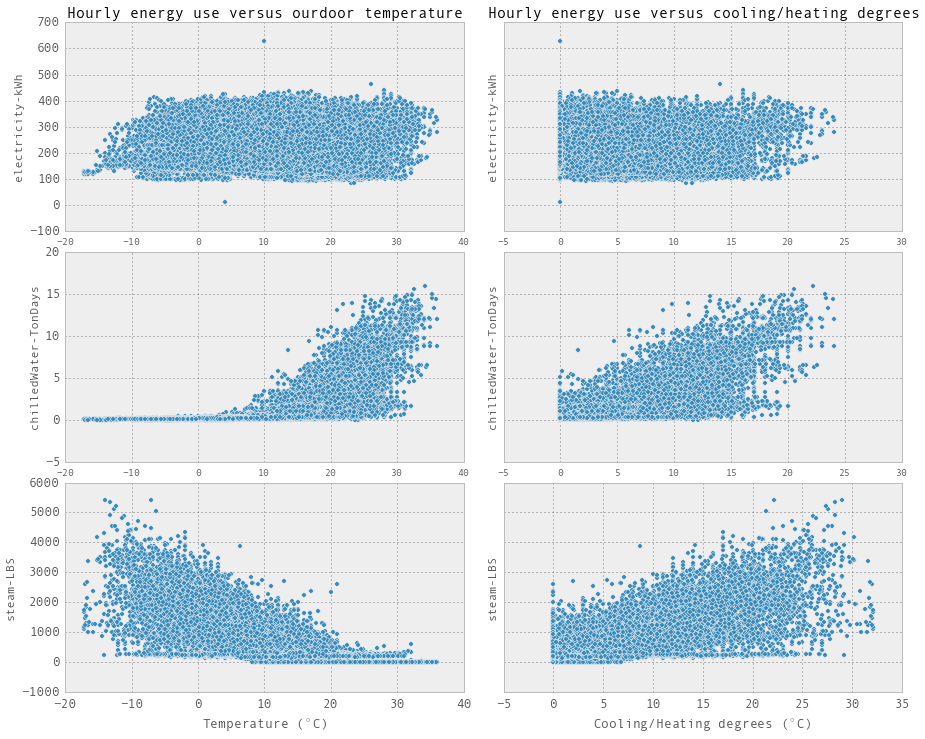

In [45]:
fig, ax = plt.subplots(3, 2, sharey='row', figsize = (15, 12))
fig.subplots_adjust(hspace = 0.1, wspace = 0.1)

hourlyElectricityWithFeatures.plot(kind = 'scatter', x = 'T-C', y = 'electricity-kWh', ax = ax[0,0])
hourlyElectricityWithFeatures.plot(kind = 'scatter', x = 'coolingDegrees', y = 'electricity-kWh', ax = ax[0,1])
hourlyChilledWaterWithFeatures.plot(kind = 'scatter', x = 'T-C', y = 'chilledWater-TonDays', ax = ax[1,0])
hourlyChilledWaterWithFeatures.plot(kind = 'scatter', x = 'coolingDegrees', y = 'chilledWater-TonDays', ax = ax[1,1])
hourlySteamWithFeatures.plot(kind = 'scatter', x = 'T-C', y = 'steam-LBS', ax = ax[2,0])
hourlySteamWithFeatures.plot(kind = 'scatter', x = 'heatingDegrees', y = 'steam-LBS', ax = ax[2,1])

for i in range(3):    
    ax[i,0].tick_params(which=u'major', reset=False, axis = 'y', labelsize = 13)
    #ax[i,0].set_axis_bgcolor('w')

for i in range(2):    
    ax[2,i].tick_params(which=u'major', reset=False, axis = 'x', labelsize = 13)

ax[2,0].set_xlabel(r'Temperature ($^\circ$C)', fontsize = 13)
ax[2,0].set_xlim([-20,40])
ax[0,0].set_title('Hourly energy use versus ourdoor temperature', fontsize = 15)

ax[2,1].set_xlabel(r'Cooling/Heating degrees ($^\circ$C)', fontsize = 13)
#ax[2,1].set_xlim([0,30])
ax[0,1].set_title('Hourly energy use versus cooling/heating degrees', fontsize = 15)

plt.show()

> Chilled water and steam are strongly co-related with temperature. However, using only outdoor temperature or cooling/heating degrees to predict hourly chilled water and steam is not suffient.

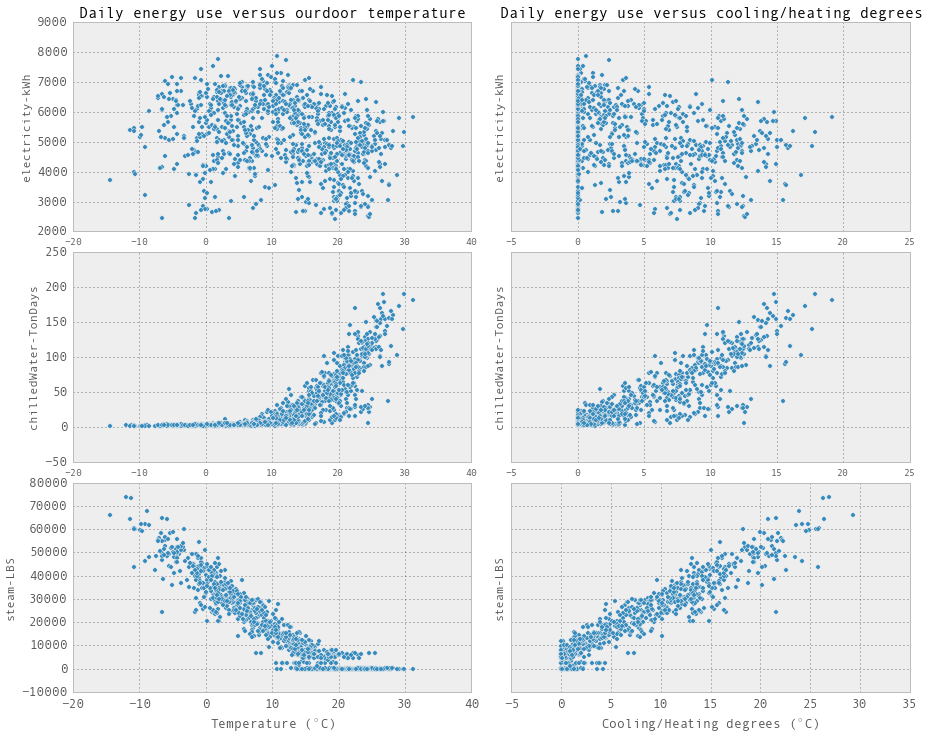

In [46]:
fig, ax = plt.subplots(3, 2, sharey='row', figsize = (15, 12))
fig.subplots_adjust(hspace = 0.1, wspace = 0.1)

dailyElectricityWithFeatures.plot(kind = 'scatter', x = 'T-C', y = 'electricity-kWh', ax = ax[0,0])
dailyElectricityWithFeatures.plot(kind = 'scatter', x = 'coolingDegrees', y = 'electricity-kWh', ax = ax[0,1])
dailyChilledWaterWithFeatures.plot(kind = 'scatter', x = 'T-C', y = 'chilledWater-TonDays', ax = ax[1,0])
dailyChilledWaterWithFeatures.plot(kind = 'scatter', x = 'coolingDegrees', y = 'chilledWater-TonDays', ax = ax[1,1])
dailySteamWithFeatures.plot(kind = 'scatter', x = 'T-C', y = 'steam-LBS', ax = ax[2,0])
dailySteamWithFeatures.plot(kind = 'scatter', x = 'heatingDegrees', y = 'steam-LBS', ax = ax[2,1])

for i in range(3):    
    ax[i,0].tick_params(which=u'major', reset=False, axis = 'y', labelsize = 13)
    #ax[i,0].set_axis_bgcolor('w')

for i in range(2):    
    ax[2,i].tick_params(which=u'major', reset=False, axis = 'x', labelsize = 13)

ax[2,0].set_xlabel(r'Temperature ($^\circ$C)', fontsize = 13)
ax[2,0].set_xlim([-20,40])
ax[0,0].set_title('Daily energy use versus ourdoor temperature', fontsize = 15)

ax[2,1].set_xlabel(r'Cooling/Heating degrees ($^\circ$C)', fontsize = 13)
#ax[2,1].set_xlim([0,30])
ax[0,1].set_title('Daily energy use versus cooling/heating degrees', fontsize = 15)

plt.show()

> Daily chilled water and steam has a strong linear relationship with outdoor temperature. If using cooling/heating degrees instead of T-C, one mihgt avoid stepwise linear regression.

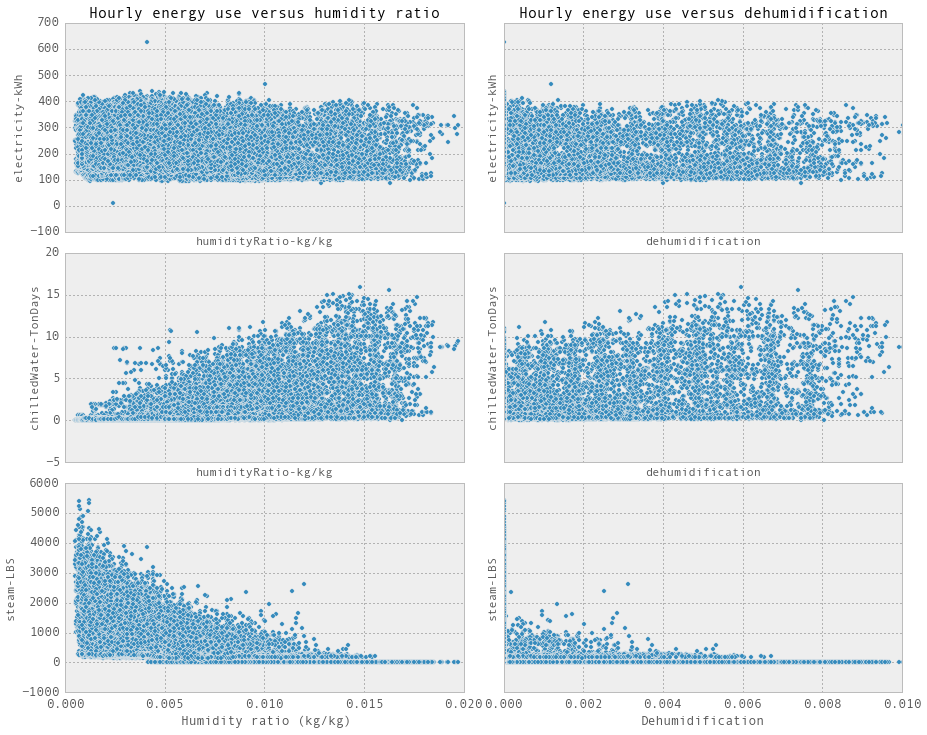

In [47]:
fig, ax = plt.subplots(3, 2, sharex = 'col', sharey='row', figsize = (15, 12))
fig.subplots_adjust(hspace = 0.1, wspace = 0.1)

hourlyElectricityWithFeatures.plot(kind = 'scatter', x = 'humidityRatio-kg/kg', y = 'electricity-kWh', ax = ax[0,0])
hourlyElectricityWithFeatures.plot(kind = 'scatter', x = 'dehumidification', y = 'electricity-kWh', ax = ax[0,1])
hourlyChilledWaterWithFeatures.plot(kind = 'scatter', x = 'humidityRatio-kg/kg', y = 'chilledWater-TonDays', ax = ax[1,0])
hourlyChilledWaterWithFeatures.plot(kind = 'scatter', x = 'dehumidification', y = 'chilledWater-TonDays', ax = ax[1,1])
hourlySteamWithFeatures.plot(kind = 'scatter', x = 'humidityRatio-kg/kg', y = 'steam-LBS', ax = ax[2,0])
hourlySteamWithFeatures.plot(kind = 'scatter', x = 'dehumidification', y = 'steam-LBS', ax = ax[2,1])

for i in range(3):    
    ax[i,0].tick_params(which=u'major', reset=False, axis = 'y', labelsize = 13)
    #ax[i,0].set_axis_bgcolor('w')

for i in range(2):    
    ax[2,i].tick_params(which=u'major', reset=False, axis = 'x', labelsize = 13)

ax[2,0].set_xlabel(r'Humidity ratio (kg/kg)', fontsize = 13)
ax[2,0].set_xlim([0,0.02])
ax[0,0].set_title('Hourly energy use versus humidity ratio', fontsize = 15)

ax[2,1].set_xlabel(r'Dehumidification', fontsize = 13)
ax[2,1].set_xlim([0,0.01])
ax[0,1].set_title('Hourly energy use versus dehumidification', fontsize = 15)

plt.show()

> Humidity ratio definitely will help predict chilled water consumption and it is better than RH and Tdrew.

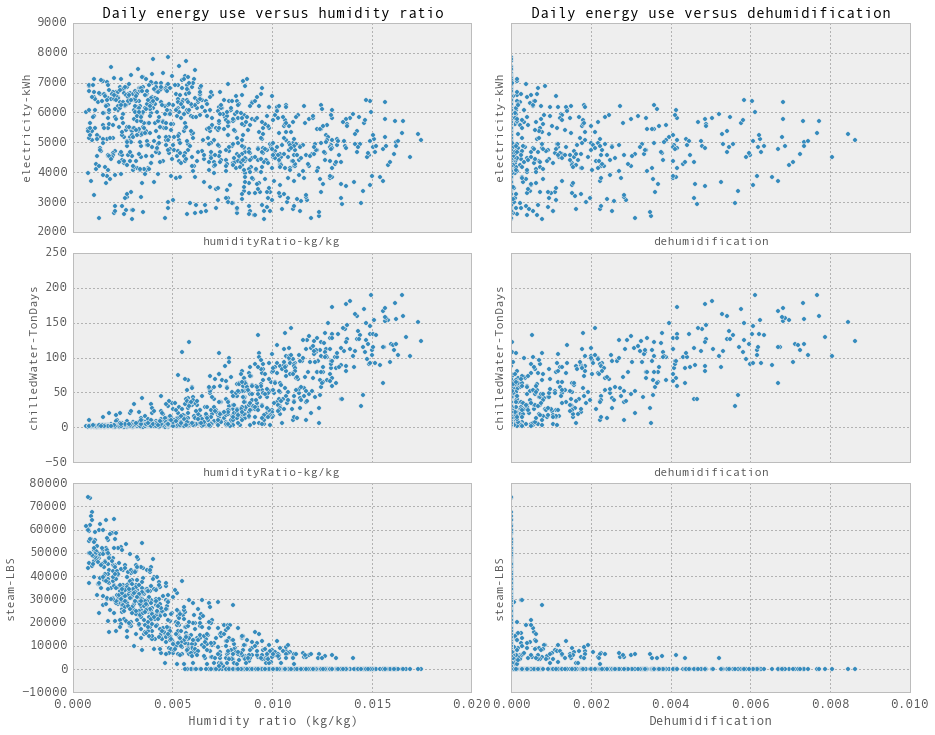

In [48]:
fig, ax = plt.subplots(3, 2, sharex = 'col', sharey='row', figsize = (15, 12))
fig.subplots_adjust(hspace = 0.1, wspace = 0.1)

dailyElectricityWithFeatures.plot(kind = 'scatter', x = 'humidityRatio-kg/kg', y = 'electricity-kWh', ax = ax[0,0])
dailyElectricityWithFeatures.plot(kind = 'scatter', x = 'dehumidification', y = 'electricity-kWh', ax = ax[0,1])
dailyChilledWaterWithFeatures.plot(kind = 'scatter', x = 'humidityRatio-kg/kg', y = 'chilledWater-TonDays', ax = ax[1,0])
dailyChilledWaterWithFeatures.plot(kind = 'scatter', x = 'dehumidification', y = 'chilledWater-TonDays', ax = ax[1,1])
dailySteamWithFeatures.plot(kind = 'scatter', x = 'humidityRatio-kg/kg', y = 'steam-LBS', ax = ax[2,0])
dailySteamWithFeatures.plot(kind = 'scatter', x = 'dehumidification', y = 'steam-LBS', ax = ax[2,1])

for i in range(3):    
    ax[i,0].tick_params(which=u'major', reset=False, axis = 'y', labelsize = 13)
    #ax[i,0].set_axis_bgcolor('w')

for i in range(2):    
    ax[2,i].tick_params(which=u'major', reset=False, axis = 'x', labelsize = 13)

ax[2,0].set_xlabel(r'Humidity ratio (kg/kg)', fontsize = 13)
ax[2,0].set_xlim([0,0.02])
ax[0,0].set_title('Daily energy use versus humidity ratio', fontsize = 15)

ax[2,1].set_xlabel(r'Dehumidification', fontsize = 13)
ax[2,1].set_xlim([0,0.01])
ax[0,1].set_title('Daily energy use versus dehumidification', fontsize = 15)

plt.show()

> Dehumidification is designed for chilled water prediction, not steam.

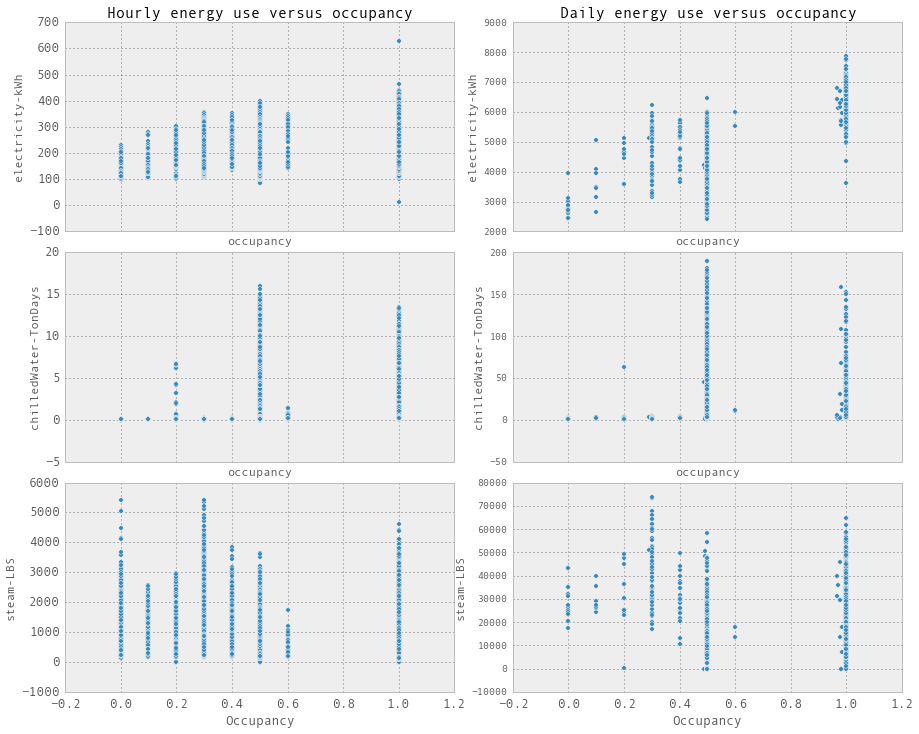

In [49]:
fig, ax = plt.subplots(3, 2, sharex = 'col', figsize = (15, 12))
fig.subplots_adjust(hspace = 0.1, wspace = 0.15)

hourlyElectricityWithFeatures.plot(kind = 'scatter', x = 'occupancy', y = 'electricity-kWh', ax = ax[0,0])
dailyElectricityWithFeatures.plot(kind = 'scatter', x = 'occupancy', y = 'electricity-kWh', ax = ax[0,1])
hourlyChilledWaterWithFeatures.plot(kind = 'scatter', x = 'occupancy', y = 'chilledWater-TonDays', ax = ax[1,0])
dailyChilledWaterWithFeatures.plot(kind = 'scatter', x = 'occupancy', y = 'chilledWater-TonDays', ax = ax[1,1])
hourlySteamWithFeatures.plot(kind = 'scatter', x = 'occupancy', y = 'steam-LBS', ax = ax[2,0])
dailySteamWithFeatures.plot(kind = 'scatter', x = 'occupancy', y = 'steam-LBS', ax = ax[2,1])

for i in range(3):    
    ax[i,0].tick_params(which=u'major', reset=False, axis = 'y', labelsize = 13)
    #ax[i,0].set_axis_bgcolor('w')

for i in range(2):    
    ax[2,i].tick_params(which=u'major', reset=False, axis = 'x', labelsize = 13)

ax[2,0].set_xlabel(r'Occupancy', fontsize = 13)
#ax[2,0].set_xlim([0,0.02])
ax[0,0].set_title('Hourly energy use versus occupancy', fontsize = 15)

ax[2,1].set_xlabel(r'Occupancy', fontsize = 13)

#ax[2,1].set_xlim([0,0.01])
ax[0,1].set_title('Daily energy use versus occupancy', fontsize = 15)

plt.show()

> Occupancy is derived from academic calendar, holidays and weekends. Basiaclly, we just assign a lower value to holidays, weekends and summer. cosHour, occupancy might help, might not, since they are just estimation of occupancy.

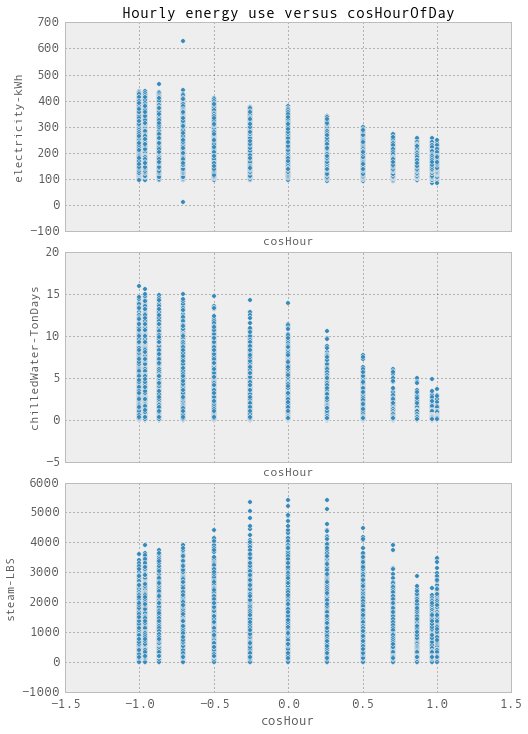

In [50]:
fig, ax = plt.subplots(3, 1, sharex = 'col', figsize = (8, 12))
fig.subplots_adjust(hspace = 0.1, wspace = 0.15)

hourlyElectricityWithFeatures.plot(kind = 'scatter', x = 'cosHour', y = 'electricity-kWh', ax = ax[0])
hourlyChilledWaterWithFeatures.plot(kind = 'scatter', x = 'cosHour', y = 'chilledWater-TonDays', ax = ax[1])
hourlySteamWithFeatures.plot(kind = 'scatter', x = 'cosHour', y = 'steam-LBS', ax = ax[2])

for i in range(3):    
    ax[i].tick_params(which=u'major', reset=False, axis = 'y', labelsize = 13)
    #ax[i,0].set_axis_bgcolor('w')

ax[2].tick_params(which=u'major', reset=False, axis = 'x', labelsize = 13)

ax[2].set_xlabel(r'cosHour', fontsize = 13)
#ax[2,0].set_xlim([0,0.02])
ax[0].set_title('Hourly energy use versus cosHourOfDay', fontsize = 15)

plt.show()

> There is some strend between energy use and cosHour.

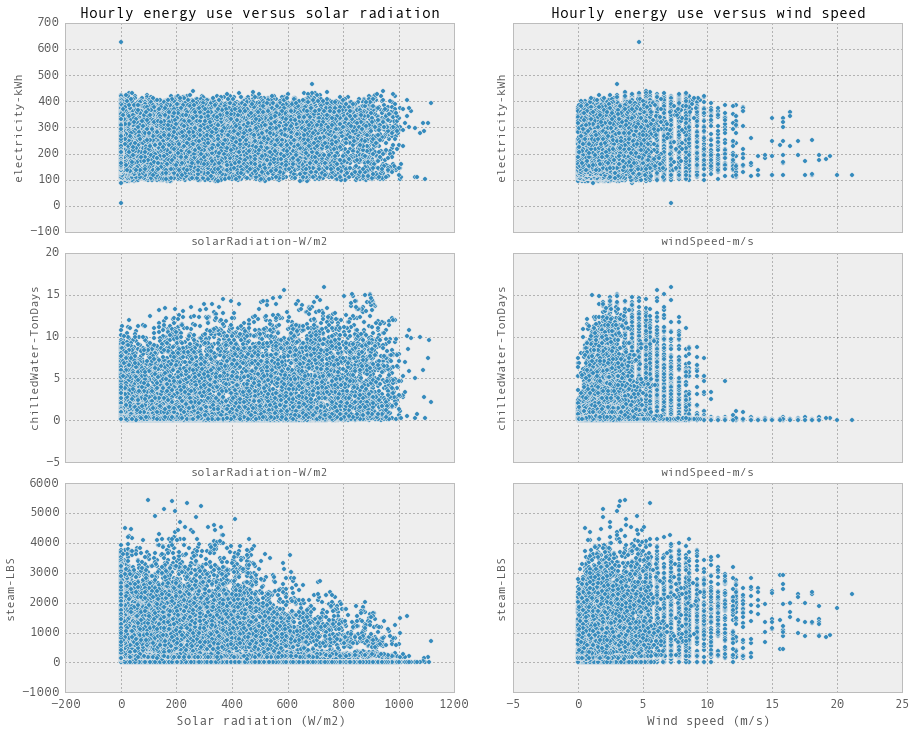

In [51]:
fig, ax = plt.subplots(3, 2, sharex = 'col', sharey = 'row', figsize = (15, 12))
fig.subplots_adjust(hspace = 0.1, wspace = 0.15)

hourlyElectricityWithFeatures.plot(kind = 'scatter', x = 'solarRadiation-W/m2', y = 'electricity-kWh', ax = ax[0,0])
hourlyElectricityWithFeatures.plot(kind = 'scatter', x = 'windSpeed-m/s', y = 'electricity-kWh', ax = ax[0,1])
hourlyChilledWaterWithFeatures.plot(kind = 'scatter', x = 'solarRadiation-W/m2', y = 'chilledWater-TonDays', ax = ax[1,0])
hourlyChilledWaterWithFeatures.plot(kind = 'scatter', x = 'windSpeed-m/s', y = 'chilledWater-TonDays', ax = ax[1,1])
hourlySteamWithFeatures.plot(kind = 'scatter', x = 'solarRadiation-W/m2', y = 'steam-LBS', ax = ax[2,0])
hourlySteamWithFeatures.plot(kind = 'scatter', x = 'windSpeed-m/s', y = 'steam-LBS', ax = ax[2,1])

for i in range(3):    
    ax[i,0].tick_params(which=u'major', reset=False, axis = 'y', labelsize = 13)
    #ax[i,0].set_axis_bgcolor('w')

for i in range(2):    
    ax[2,i].tick_params(which=u'major', reset=False, axis = 'x', labelsize = 13)

ax[2,0].set_xlabel(r'Solar radiation (W/m2)', fontsize = 13)
#ax[2,0].set_xlim([0,0.02])
ax[0,0].set_title('Hourly energy use versus solar radiation', fontsize = 15)

ax[2,1].set_xlabel(r'Wind speed (m/s)', fontsize = 13)

#ax[2,1].set_xlim([0,0.01])
ax[0,1].set_title('Hourly energy use versus wind speed', fontsize = 15)

plt.show()

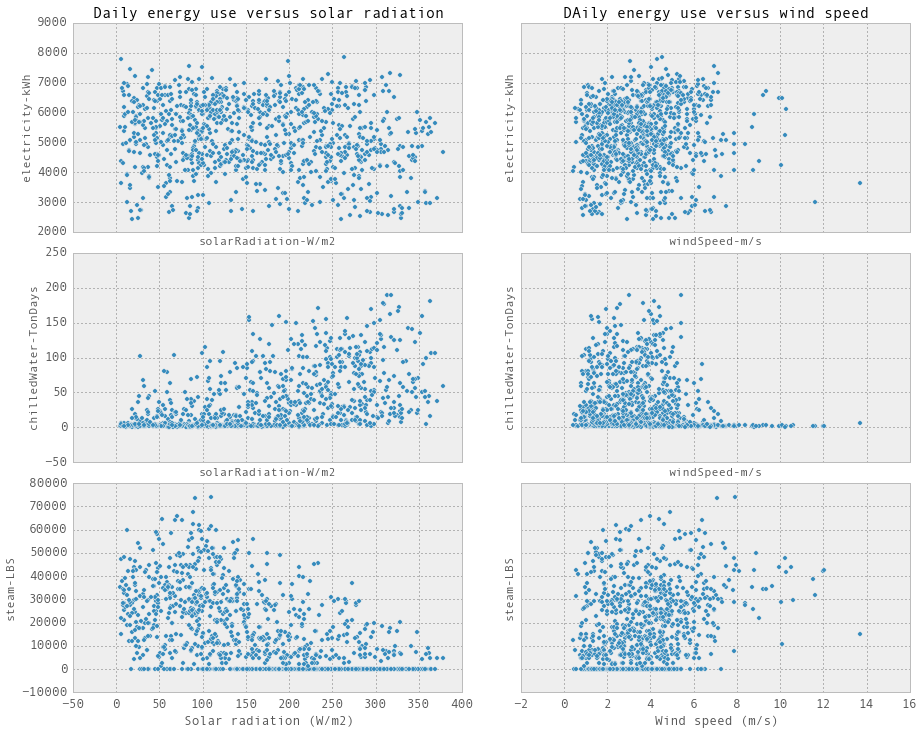

In [52]:
fig, ax = plt.subplots(3, 2, sharex = 'col', sharey = 'row', figsize = (15, 12))
fig.subplots_adjust(hspace = 0.1, wspace = 0.15)

dailyElectricityWithFeatures.plot(kind = 'scatter', x = 'solarRadiation-W/m2', y = 'electricity-kWh', ax = ax[0,0])
dailyElectricityWithFeatures.plot(kind = 'scatter', x = 'windSpeed-m/s', y = 'electricity-kWh', ax = ax[0,1])
dailyChilledWaterWithFeatures.plot(kind = 'scatter', x = 'solarRadiation-W/m2', y = 'chilledWater-TonDays', ax = ax[1,0])
dailyChilledWaterWithFeatures.plot(kind = 'scatter', x = 'windSpeed-m/s', y = 'chilledWater-TonDays', ax = ax[1,1])
dailySteamWithFeatures.plot(kind = 'scatter', x = 'solarRadiation-W/m2', y = 'steam-LBS', ax = ax[2,0])
dailySteamWithFeatures.plot(kind = 'scatter', x = 'windSpeed-m/s', y = 'steam-LBS', ax = ax[2,1])

for i in range(3):    
    ax[i,0].tick_params(which=u'major', reset=False, axis = 'y', labelsize = 13)
    #ax[i,0].set_axis_bgcolor('w')

for i in range(2):    
    ax[2,i].tick_params(which=u'major', reset=False, axis = 'x', labelsize = 13)

ax[2,0].set_xlabel(r'Solar radiation (W/m2)', fontsize = 13)
#ax[2,0].set_xlim([0,0.02])
ax[0,0].set_title('Daily energy use versus solar radiation', fontsize = 15)

ax[2,1].set_xlabel(r'Wind speed (m/s)', fontsize = 13)

#ax[2,1].set_xlim([0,0.01])
ax[0,1].set_title('DAily energy use versus wind speed', fontsize = 15)

plt.show()

> Solar radiation and wind speed are not that important and it is correlated with temperature.

### Findings

* Electricity is not co-related with weather data (temperature). The idea of using weather information to predict electricity will NOT work. I think it mostly depends on time/occupancy. But we can still do some pattern exploration to figure out day/night, weekday/weekend, school day/holiday electricity consumption pattern. Actually, we should have noticed that from monthly data.


* Chilled water and steam are strongly correlated with temperature and humidity. Daily chilled water and steam consumption have a good linear relationship with cooling and heating degrees. Therefore, simple linear regression might already be accurate enough. 



* Although chilled water and steam consumption are strongly correlated with weather, using with weather information to predict hourly chilled water and steam is not suffient according to the plots above. This is because operation schedule affects hourly energy consumption. Occupancy and operation schedule must be included in hourly chilled water and steam prediction.


* Humidity ratio definitely will help predict chilled water consumption and it is better than RH and Tdrew.


* Cooling and heating degrees will help predict daily chilled water and steam. If using cooling/heating degrees instead of T-C, one mihgt avoid stepwise linear regression.


* Occupancy is derived from academic calendar, holidays and weekends. Basiaclly, we just assign a lower value to holidays, weekends and summer. cosHour, occupancy might help, might not, since they are just estimation of occupancy.